# CD7 Dimensionality reduction

In [61]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
# %load ../common_.py
import sys
sys.path.append("..")
from common import *

In [63]:
from ehv.masking import plot_scip_segmentation
from ehv.core import plot_gate_czi
from sklearn.preprocessing import scale, StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import umap
from sklearn.pipeline import make_pipeline
import flowutils

In [64]:
data_dir = Path("/data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/results/scip/202203221745/")

df = pq.read_table(data_dir / "features.parquet").to_pandas()

df = df.set_index(["meta_panel", "meta_replicate", "meta_P", "meta_id"])
df = df.loc["D"]
df = df.loc[numpy.load(data_dir / "neutrophils.npy", allow_pickle=True)]
df = df.sort_index()

In [65]:
df.shape

(18914, 1494)

In [74]:
(df["meta_bbox_maxr"] - df["meta_bbox_minr"]).max()

109.0

In [75]:
(df["meta_bbox_maxc"] - df["meta_bbox_minc"]).max()

112.0

In [66]:
%%time
pca = PCA().fit_transform(scale(df.filter(regex="feat.*(Bright|Oblique|PGC)")))

/data/gent/420/vsc42015/python_lib_doduo/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


CPU times: user 3min 3s, sys: 3.84 s, total: 3min 7s
Wall time: 13.6 s


<AxesSubplot:>

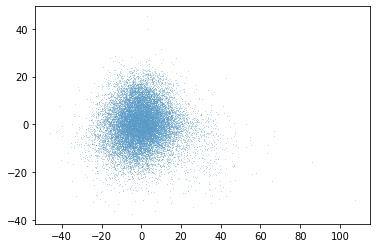

In [67]:
seaborn.scatterplot(x=pca[:, 0], y=pca[:, 1], s=0.5, alpha=0.8, edgecolors="none")

<AxesSubplot:>

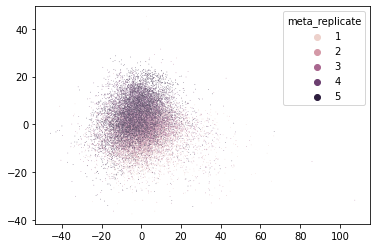

In [68]:
seaborn.scatterplot(x=pca[:, 0], y=pca[:, 1], s=0.5, alpha=0.8, edgecolors="none", hue=df.index.get_level_values("meta_replicate"))

In [32]:
%%time
tsne = TSNE(n_jobs=16, init="pca", learning_rate="auto").fit_transform(scale(df.filter(regex="feat.*(Bright|Oblique|PGC)")))

/data/gent/420/vsc42015/python_lib_doduo/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/data/gent/420/vsc42015/python_lib_doduo/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/data/gent/420/vsc42015/python_lib_doduo/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


CPU times: user 11min 49s, sys: 1min 13s, total: 13min 3s
Wall time: 1min 50s


<AxesSubplot:>

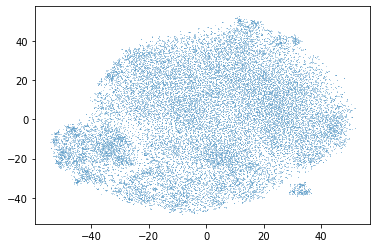

In [33]:
seaborn.scatterplot(x=tsne[:, 0], y=tsne[:, 1], s=0.5, alpha=0.8, edgecolors="none")

# UMAP

In [69]:
%%time
umap_ = umap.UMAP(n_jobs=10).fit_transform(scale(df.filter(regex="feat.*(Bright|Oblique|PGC)")))

/data/gent/420/vsc42015/python_lib_doduo/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


CPU times: user 1min 50s, sys: 1.1 s, total: 1min 51s
Wall time: 13.2 s


<AxesSubplot:>

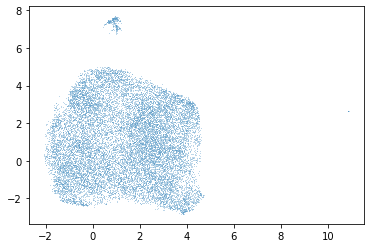

In [70]:
seaborn.scatterplot(x=umap_[:, 0], y=umap_[:, 1], s=0.5, alpha=0.8, edgecolors="none")

<AxesSubplot:>

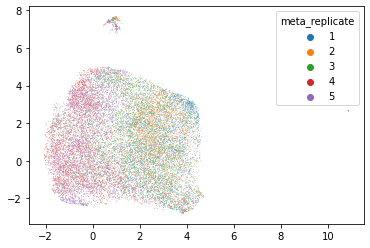

In [71]:
seaborn.scatterplot(x=umap_[:, 0], y=umap_[:, 1], s=0.5, hue=df.reset_index()["meta_replicate"], palette="tab10", alpha=0.8, edgecolors="none")

In [76]:
sel1 = umap_[:, 1] > 6 

In [77]:
from sklearn.feature_selection import mutual_info_classif

In [78]:
mi = mutual_info_classif(scale(df.filter(regex="feat.*(Bright|Oblique|PGC)")), sel1, n_neighbors=10)

/data/gent/420/vsc42015/python_lib_doduo/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


In [79]:
mi = pandas.Series(mi, index=df.filter(regex="feat.*(Bright|Oblique|PGC)").columns).sort_values()

In [80]:
mi.iloc[-40:]

feat_combined_mad_PGC                      0.031886
feat_combined_bgcorr_mad_PGC               0.031957
feat_min_Bright                            0.031981
feat_bgcorr_mad_PGC                        0.032086
feat_mad_PGC                               0.032101
feat_combined_bgcorr_min_Bright            0.032207
feat_bgcorr_min_Bright                     0.032264
feat_combined_min_Bright                   0.032323
feat_combined_upper_quartile_PGC           0.034549
feat_upper_quartile_PGC                    0.034594
feat_combined_bgcorr_upper_quartile_PGC    0.034632
feat_bgcorr_upper_quartile_PGC             0.034648
feat_sobel_max_Oblique                     0.037724
feat_combined_sobel_max_Oblique            0.037724
feat_sobel_mean_Oblique                    0.039703
feat_combined_sobel_mean_Oblique           0.039703
feat_combined_bgcorr_max_Oblique           0.039858
feat_bgcorr_max_Oblique                    0.039895
feat_combined_max_Oblique                  0.039916
feat_max_Obl

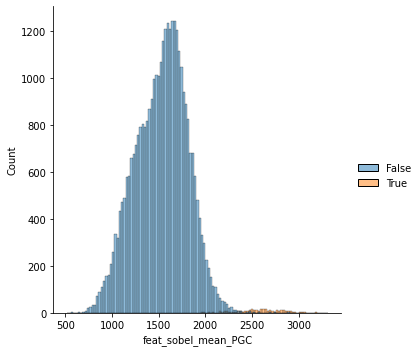

In [16]:
seaborn.displot(data=df, x="feat_sobel_mean_PGC", hue=sel1)

In [81]:
df = df[~sel1]
df.shape

(18650, 1494)

# UMAP after removal of small objects

In [47]:
%%time
umap2_ = umap.UMAP(n_jobs=10, min_dist=0, n_neighbors=30).fit_transform(scale(df.filter(regex="feat.*(Bright|Oblique|PGC)")))

/data/gent/420/vsc42015/python_lib_doduo/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


CPU times: user 3min 45s, sys: 3.16 s, total: 3min 48s
Wall time: 26.2 s


<AxesSubplot:>

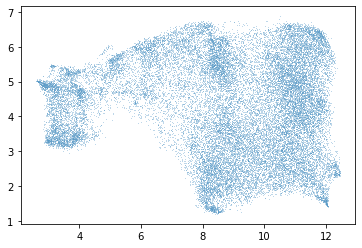

In [48]:
seaborn.scatterplot(x=umap2_[:, 0], y=umap2_[:, 1], s=0.5, alpha=0.8, edgecolors="none")

<AxesSubplot:>

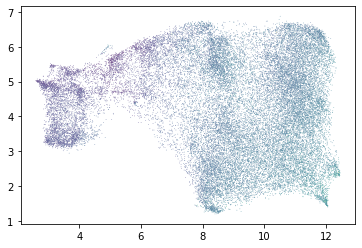

In [49]:
seaborn.scatterplot(x=umap2_[:, 0], y=umap2_[:, 1], s=0.5, alpha=0.8, hue=df["feat_sum_RPe"], palette="viridis", edgecolors="none", legend=None)

<AxesSubplot:>

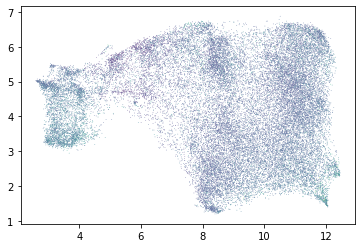

In [50]:
seaborn.scatterplot(x=umap2_[:, 0], y=umap2_[:, 1], s=0.5, alpha=0.8, hue=df["feat_sum_EGFP"], palette="viridis", edgecolors="none", legend=None)

<AxesSubplot:>

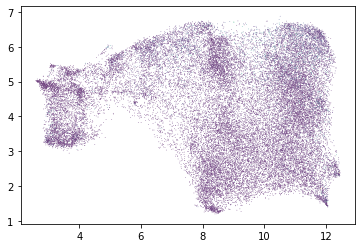

In [51]:
seaborn.scatterplot(x=umap2_[:, 0], y=umap2_[:, 1], s=0.5, alpha=0.8, hue=df["feat_sum_DAPI"], palette="viridis", edgecolors="none", legend=None)

## Structure 1

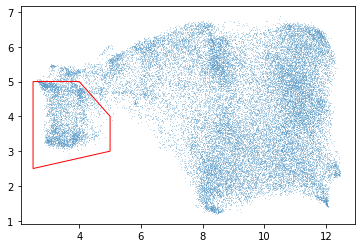

In [52]:
from matplotlib.path import Path as mPath
from matplotlib.patches import Polygon

vertices = numpy.array([
    [5, 3],
    [5, 4],
    [4, 5],
    [2.5, 5],
    [2.5, 2.5]
])
p = Polygon(vertices, facecolor = 'none', edgecolor="red")
ax = seaborn.scatterplot(x=umap2_[:, 0], y=umap2_[:, 1], s=0.5, alpha=0.8, edgecolors="none")
ax.add_patch(p)

In [53]:
sel1 = mPath(vertices).contains_points(umap2_)

In [54]:
%%time
mi = mutual_info_classif(scale(df.filter(regex="feat.*DAPI")), sel1, n_neighbors=10)

/data/gent/420/vsc42015/python_lib_doduo/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


CPU times: user 36.7 s, sys: 41.3 ms, total: 36.7 s
Wall time: 36.8 s


In [55]:
mi = pandas.Series(mi, index=df.filter(regex="feat.*DAPI").columns).sort_values()

In [56]:
mi.iloc[-40:]

feat_filled_area_DAPI                           0.076093
feat_moments-0-0_DAPI                           0.076341
feat_moments-2-0_DAPI                           0.076488
feat_moments-0-2_DAPI                           0.077161
feat_moments-0-1_DAPI                           0.078023
feat_moments-1-0_DAPI                           0.078792
feat_extent_DAPI                                0.080178
feat_combined_glcm_mean_dissimilarity_5_DAPI    0.080354
feat_moments_central-3-2_DAPI                   0.082118
feat_moments-3-1_DAPI                           0.082817
feat_combined_bgcorr_skewness_DAPI              0.083414
feat_combined_skewness_DAPI                     0.083414
feat_moments-2-1_DAPI                           0.084159
feat_moments_central-2-3_DAPI                   0.084299
feat_moments-1-3_DAPI                           0.084334
feat_moments-3-2_DAPI                           0.085341
feat_moments-1-2_DAPI                           0.086684
feat_moments-2-3_DAPI          

<AxesSubplot:>

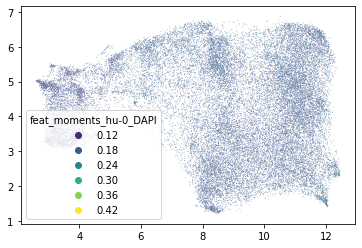

In [57]:
seaborn.scatterplot(x=umap2_[:, 0], y=umap2_[:, 1], hue=df["feat_moments_hu-0_DAPI"], palette="viridis", s=0.5, alpha=0.8, edgecolors="none")

<AxesSubplot:>

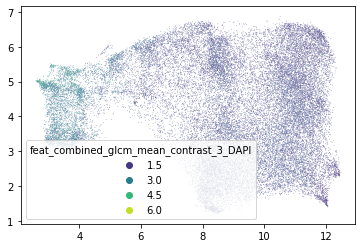

In [58]:
seaborn.scatterplot(x=umap2_[:, 0], y=umap2_[:, 1], hue=df["feat_combined_glcm_mean_contrast_3_DAPI"], palette="viridis", s=0.5, alpha=0.8, edgecolors="none")

<AxesSubplot:>

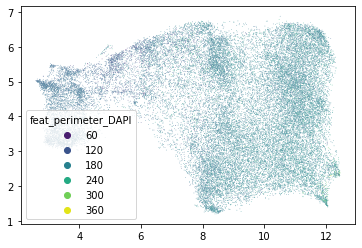

In [59]:
seaborn.scatterplot(x=umap2_[:, 0], y=umap2_[:, 1], hue=df["feat_perimeter_DAPIfeat_perimeter_DAPIfeat_perimeter_DAPI"], palette="viridis", s=0.5, alpha=0.8, edgecolors="none")

0 P12-D1 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P12-D3 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P16-D5 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P17-D3 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P17-D4 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P18-D5 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P19-D1 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P19-D2 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P2-D3 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P2-D5 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P20-D1 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P20-D2 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P21-D1 /data/gent/vo/000/gvo

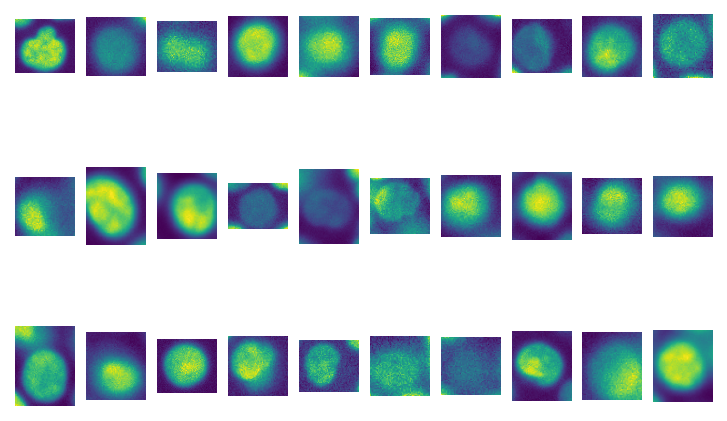

In [60]:
plot_gate_czi(sel1, df, maxn=30, channel=0)

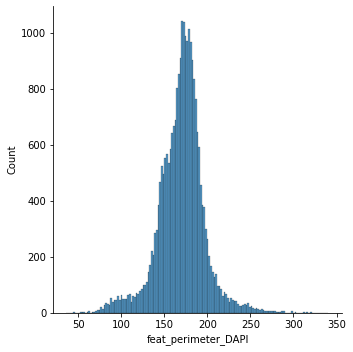

In [101]:
seaborn.displot(data=df, x="feat_perimeter_DAPI")

0 P1-D5 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P10-D1 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P10-D5 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P12-D5 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P13-D1 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P13-D2 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P13-D5 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P14-D1 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P16-D2 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P17-D1 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P17-D2 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P17-D4 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P18-D4 /data/gent/vo/000/gv

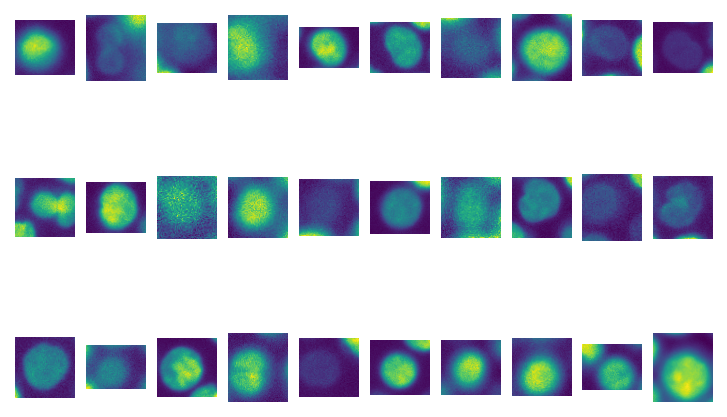

In [78]:
sel2 = df["feat_perimeter_DAPI"] > 300
plot_gate_czi(sel1, df, maxn=30, channel=0)

In [80]:
areadiff = df["feat_convex_area_DAPI"] - df["feat_area_DAPI"]

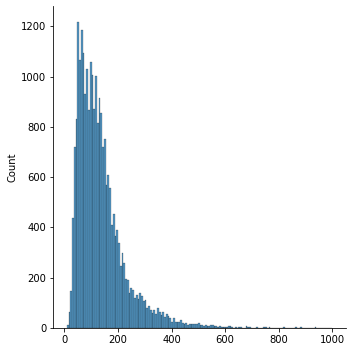

In [81]:
seaborn.displot(areadiff)

0 P10-D2 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P14-D2 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P14-D3 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P15-D4 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P15-D5 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P17-D4 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P18-D4 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P18-D5 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P19-D5 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P22-D2 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P4-D5 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P7-D1 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P8-D3 /data/gent/vo/000/gvo0

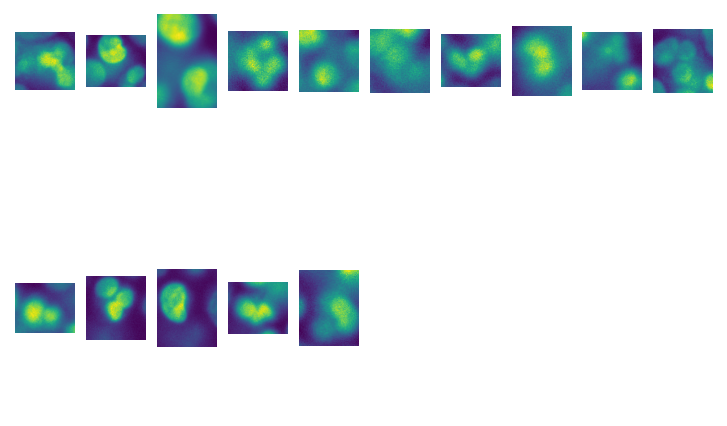

In [82]:
sel3 = areadiff > 800
plot_gate_czi(sel3, df)

<AxesSubplot:>

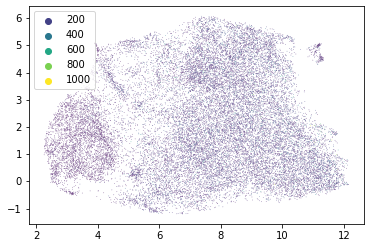

In [83]:
seaborn.scatterplot(x=umap2_[:, 0], y=umap2_[:, 1], hue=areadiff, palette="viridis", s=0.5, alpha=0.8, edgecolors="none")

## Structure 2

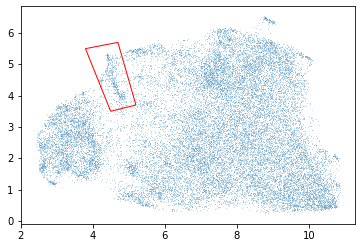

In [110]:
from matplotlib.path import Path as mPath
from matplotlib.patches import Polygon

vertices = numpy.array([
    [3.8,5.5],
    [4.7, 5.7],
    [5.2, 3.7],
    [4.5, 3.5]
])
p = Polygon(vertices, facecolor = 'none', edgecolor="red")
ax = seaborn.scatterplot(x=umap2_[:, 0], y=umap2_[:, 1], s=0.5, alpha=0.8, edgecolors="none")
ax.add_patch(p)

In [111]:
sel2 = mPath(vertices).contains_points(umap2_)

In [112]:
%%time
mi = mutual_info_classif(scale(df.filter(regex="feat.*DAPI")), sel2, n_neighbors=10)

/data/gent/420/vsc42015/python_lib_doduo/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


CPU times: user 24 s, sys: 6.89 ms, total: 24 s
Wall time: 24.1 s


In [113]:
mi = pandas.Series(mi, index=df.filter(regex="feat.*DAPI").columns).sort_values()

In [114]:
mi.iloc[-40:]

feat_perimeter_crofton_DAPI                     0.011040
feat_feret_diameter_max_DAPI                    0.011081
feat_major_axis_length_DAPI                     0.011210
feat_perimeter_DAPI                             0.011255
feat_moments-3-0_DAPI                           0.011438
feat_inertia_tensor_eigvals-0_DAPI              0.011497
feat_moments-2-0_DAPI                           0.011865
feat_combined_glcm_mean_dissimilarity_3_DAPI    0.012192
feat_moments_central-2-0_DAPI                   0.012361
feat_moments-3-1_DAPI                           0.012369
feat_combined_sum_DAPI                          0.012389
feat_combined_bgcorr_sum_DAPI                   0.012406
feat_inertia_tensor-0-0_DAPI                    0.013338
feat_moments-2-1_DAPI                           0.013429
feat_minor_axis_length_DAPI                     0.013517
feat_moments-3-3_DAPI                           0.013636
feat_moments-3-2_DAPI                           0.013730
feat_inertia_tensor_eigvals-1_D

<AxesSubplot:>

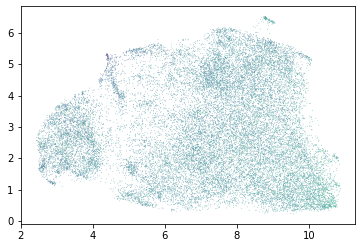

In [116]:
seaborn.scatterplot(x=umap2_[:, 0], y=umap2_[:, 1], hue=df["feat_combined_glcm_mean_homogeneity_5_DAPI"], palette="viridis", s=0.5, alpha=0.8, edgecolors="none", legend=None)

0 P1-D3 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P1-D4 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P10-D2 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P11-D1 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P11-D2 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P11-D3 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P12-D3 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P12-D4 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P12-D5 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P13-D4 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P14-D3 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P14-D4 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P15-D3 /data/gent/vo/000/gvo

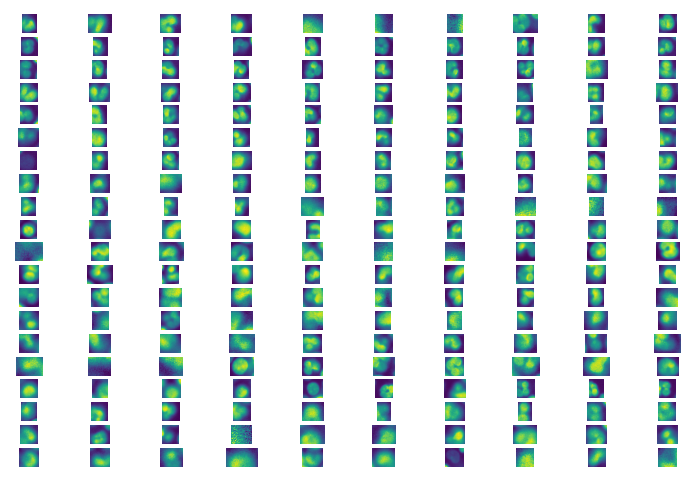

In [117]:
plot_gate_czi(sel2, df)

## Structure 3